In [1]:
from matplotlib import pyplot as plt
import numpy as np

Using the algorithm (Section 1.4.1) simulate a path of the Wiener process.
Number of end-points of the grid including T is N = 100, length of the
interval $[0, T]$ in time units is 1, time increment is $∆ = \frac {T
} N$. Plot the
path.ив*


In [ ]:
.Using the algorithm (Section 1.4.1) simulate a path of the Wiener process.
Number of end-points of the grid including T is N = 100, length of the
interval $[0, T]$ in time units is 1, time increment is ∆ = T /N. Plot the
path.$



In [51]:
#Определеим блок со значениями
T = 1
N = 100
t = np.linspace(0, T, N + 1)
Delta = np.sqrt(T / N)

In [27]:
def f(Delta, X):
    W = [] #начальная инициализция
    #N = 100 
    #T = 1
    W += [0] #накапливаю и присваиваю значение
    for i in range (1,len(X)):
        W += [ W[i -1]+ np.random.normal (0, 1, 1) * Delta ] # формула W(ti−1) + z ·√∆t.
    return W

def W_p(T, N, t, Delta):
    X = np.linspace(0, T, N + 1)
    W = f(Delta, X)
    plt.figure (figsize =(10, 7) )
    plt.grid()
    plt.plot(X, W, linewidth =2.0)
    plt.title('Wiener process')
    plt.xlabel("t")
    plt.ylabel("W")
    plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


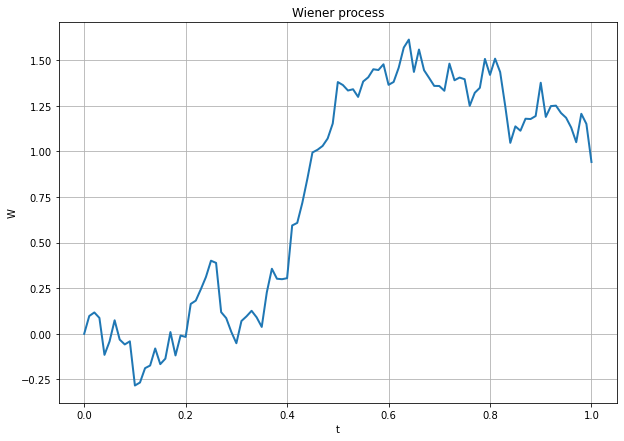

In [28]:
W_p(T, N, t, Delta)

In [ ]:
второй способ, случайное блуждание

In [ ]:
2. Using the algorithm (Section 1.4.2) simulate three paths of the Wiener
process as the limit of a random walk (n = 10, 100, 1000). Plot the paths
in one figure, add legends

In [19]:
#Определеим блок со значениями
T = 1
N = 100
t = np.linspace(0, T, N + 1)
Delta = np.sqrt(T / N)

In [29]:
def runif (n):
    L =[]
    for i in range (n):
        L += [2 * (np.random.uniform(0, 1) > 0.5) -1]
    return L

def function (x, n, S):
    if x * n > 0: #возвращаем либо частичную сумму, либо ноль
        return S[int( x * n ) -1] #частичная сумма, инт округляет
    else :
        return 0

def W_p3(T, N, t):
    n = [10, 100, 1000]
    plt.figure (figsize =(10, 7))
    plt.grid ()
    for i in n:
        S = np.cumsum(runif(i))
        W = [function(x, i, S) / np.sqrt(i) for x in t]
        plt.plot (t , W , linewidth =2.0)

    plt.title ('Wiener process')
    plt.xlabel ("t")
    plt.ylabel ("W")
    plt.show ()

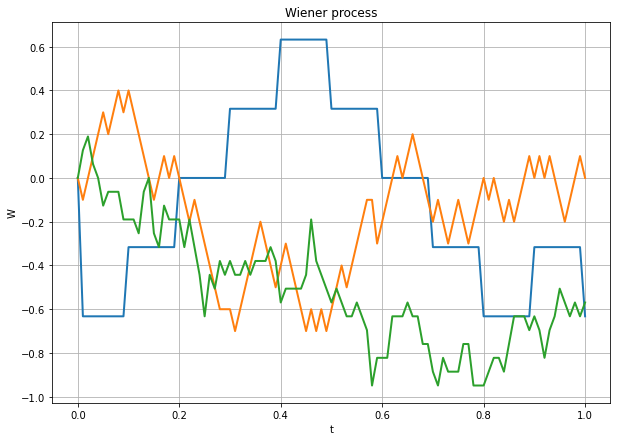

In [31]:
W_p3(T, N, t)

In [ ]:
3. Using the the Karhunen-Loeve expansion (Section 1.4.3) simulate three
paths of the Wiener process with n = 10, 50, 100 terms. Plot the paths in
one figure, add legends.


In [32]:
#Определеим блок со значениями
T = 1
N = 100
t = np.linspace(0, T, N + 1)
Delta = np.sqrt(T / N)

In [37]:
def sum_W (t, T, Z):
    Sum = 0
    for i in range (len(Z)):
      # 2√2T/(2i + 1)*π*sin(2i + 1)*π*t/(2T).
        Sum += Z[i] * (2 * np.sqrt(2 * T)) / ((2 * i + 1) * np.pi) * np.sin(((2 * i + 1) * np.pi * t) / (2 * T))
    return Sum

def L_squared_expansion(T, N, t):
    n = [10, 50, 100]
    Z = np.random.normal(0, 1, n)
    plt.figure(figsize = (10, 7))
    plt.grid()

    for k in n:
        W = []
        Z = np.random.normal(0, 1, k)
        for i in range(N + 1):
            W += [sum_W(t[i], T, Z)]
        plt.plot (t, W, linewidth =2.0)

    plt.title ('Wiener process')
    plt.xlabel ("t")
    plt.ylabel ("W")

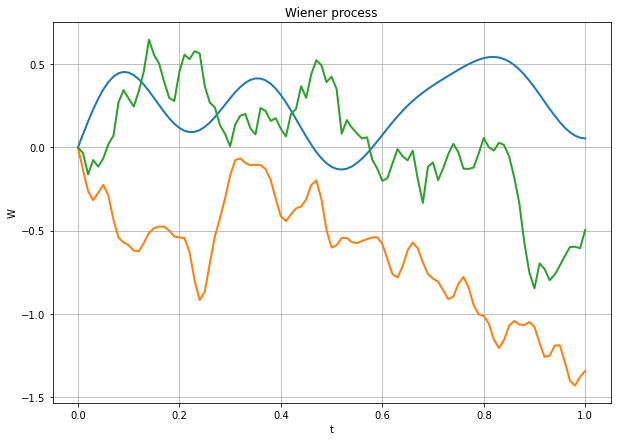

In [38]:
L_squared_expansion(T, N, t)

In [ ]:
4. trajectory of the geometric Brownian motion (Section 1.4.4) obtained from the simulation of the path of the Wiener process, σ = 0.5
(volatility), and r = 1 (interest rate).

In [15]:
#Определеим блок со значениями
T = 1
N = 100
t = np.linspace(0, T, N + 1)
Delta = np.sqrt(T / N)

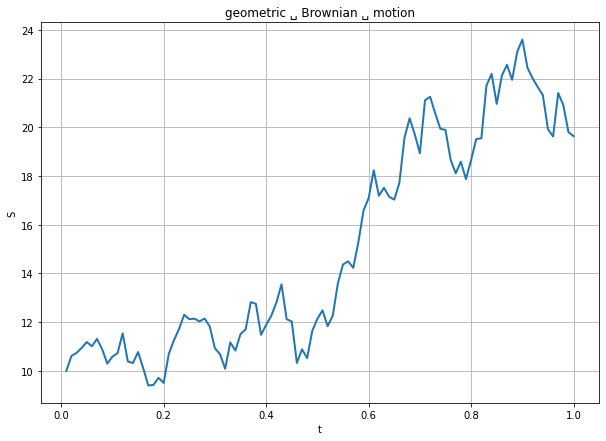

In [16]:
r =1
sigma =0.5
x =10
N =100
T =1

W =np.zeros(N)
t = np . linspace (0,T , N +1)
for i in range (1, N ) :
    W[i] = W [i -1] + np.random.normal (0, 1) * Delta     
S = [ x * np.exp (( r - sigma **2/2) * t [ i ] + sigma * W [ i ]) for i in range (len( W ) ) ]
plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (t[1:] , S , linewidth =2.0)
plt . title ("geometric ␣ Brownian ␣ motion")
plt . xlabel ("t")
plt . ylabel ("S")
plt . show ()

In [ ]:
5.  Plot a trajectory of the the Brownian bridge (Section 1.4.5) starting at x
at time 0 and terminating its run at y = −1 at time T obtained from the
simulation of the path of the Wiener process.

In [44]:
#Определеим блок со значениями
T = 1
N = 100
t = np.linspace(0, T, N)
Delta = np.sqrt(T / N)

In [45]:
def brownian_bridge(T, N, t, Delta):
    W = np.zeros(N)
    for i in range(N):
        W[i] +=[W[i-1] + np.random.normal(0, 1, 1) * np.sqrt ( Delta )]
    
    x =0
    y = -1
    BB =[x + W[i] - t[i] / T * ( W[N-1] - y + x ) for i in range (len(W))]
    plt.figure(figsize =(10, 7) )
    plt.grid()
    plt.plot (t, BB, linewidth =2.0)
    plt.scatter(t[0], x , color ="red",s =50)
    plt.scatter(t[len(t) -1] , y , color ="red", s =50)# красные точки
    plt.title('Brownian bridge')
    plt.xlabel("t")
    plt.ylabel("BB")
    plt.show()

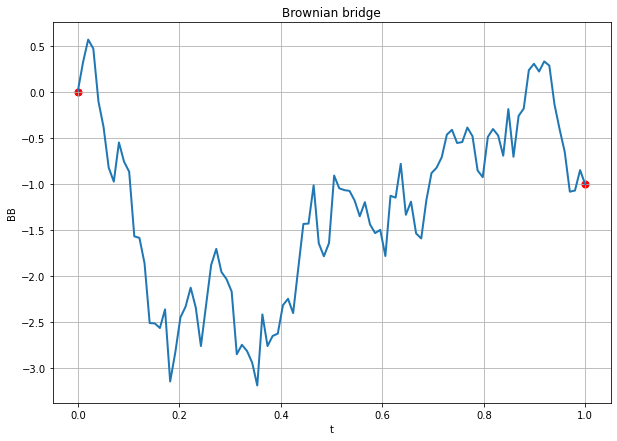

In [46]:
brownian_bridge(T, N, t, Delta)